In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
ref = cv2.imread("C:/Users/erh/eduardo/Desktop_4/INE_visao_computacional/memoria_esquerda_splitted/test/esquerda_bom/3.png", -1)
test = cv2.imread("C:/Users/erh/eduardo/Desktop_4/INE_visao_computacional/memoria_esquerda_splitted/test/esquerda_bom/6.png")

ref_gray = cv2.cvtColor(ref, cv2.COLOR_BGR2GRAY)
test_gray = cv2.cvtColor(test, cv2.COLOR_BGR2GRAY)

In [3]:
print(f"Imagem referência shape: {ref.shape}, imagem teste shape: {test.shape}")

Imagem referência shape: (350, 224, 3), imagem teste shape: (350, 224, 3)


In [4]:
def mse(img1, img2):
   h, w = img1.shape
   diff = cv2.subtract(img1, img2)
   err = np.sum(diff**2)
   mse = err/(float(h*w))
   return mse, diff

In [5]:
error, diff_image = mse(ref_gray, test_gray)

In [6]:
print("Image matching Error between the two images:", error)
cv2.imwrite("diff_image.jpg", diff_image)


Image matching Error between the two images: 56.346045918367345


True

In [7]:
teste_ruim = cv2.imread("C:/Users/erh/eduardo/Desktop_4/INE_visao_computacional/memoria_esquerda_splitted/test/esquerda_ruim/3.png")

teste_ruim_gray = cv2.cvtColor(teste_ruim, cv2.COLOR_BGR2GRAY)

error_teste_ruim, diff_ruim = mse(ref_gray, teste_ruim_gray)

print("Image matching Error between error_teste_ruim:", error_teste_ruim)
cv2.imwrite("diff_ruim.jpg", diff_ruim)

Image matching Error between error_teste_ruim: 40.17201530612245


True

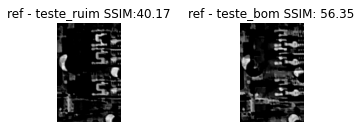

In [8]:
plt.subplot(221), plt.imshow(diff_ruim,'gray'),plt.title(f"ref - teste_ruim SSIM:{error_teste_ruim:.2f}"),plt.axis('off')
plt.subplot(222), plt.imshow(diff_image,'gray'),plt.title(f"ref - teste_bom SSIM: {error:.2f}"),plt.axis('off')
plt.show()

# Alinhamento das imagens usando Keypoints
## Tentativa 2

In [36]:
from __future__ import print_function
import cv2
import numpy as np
 
MAX_FEATURES = 500
GOOD_MATCH_PERCENT = 0.3
 
def alignImages(im1, im2):
 
  # Convert images to grayscale
  im1Gray = cv2.cvtColor(im1, cv2.COLOR_BGR2GRAY)
  im2Gray = cv2.cvtColor(im2, cv2.COLOR_BGR2GRAY)
 
  # Detect ORB features and compute descriptors.
  orb = cv2.ORB_create(MAX_FEATURES)
  keypoints1, descriptors1 = orb.detectAndCompute(im1Gray, None)
  keypoints2, descriptors2 = orb.detectAndCompute(im2Gray, None)
 
  # Match features.
  matcher = cv2.DescriptorMatcher_create(cv2.DESCRIPTOR_MATCHER_BRUTEFORCE_HAMMING)
  matches = matcher.match(descriptors1, descriptors2, None)

  # Sort matches by score
  matches = sorted(matches, key=lambda x: x.distance)
 
  # Remove not so good matches
  numGoodMatches = int(len(matches) * GOOD_MATCH_PERCENT)
  matches = matches[:numGoodMatches]
 
  # Draw top matches
  imMatches = cv2.drawMatches(im1, keypoints1, im2, keypoints2, matches, None)
  cv2.imwrite("matches2.jpg", imMatches)
 
  # Extract location of good matches
  points1 = np.zeros((len(matches), 2), dtype=np.float32)
  points2 = np.zeros((len(matches), 2), dtype=np.float32)
 
  for i, match in enumerate(matches):
    points1[i, :] = keypoints1[match.queryIdx].pt
    points2[i, :] = keypoints2[match.trainIdx].pt
 
  # Find homography
  h, mask = cv2.findHomography(points1, points2, cv2.RANSAC)
 
  # Use homography
  height, width, channels = im2.shape
  im1Reg = cv2.warpPerspective(im1, h, (width, height))
 
  return im1Reg, h
 
if __name__ == '__main__':

  # Read reference image
  refFilename = "C:/Users/erh/eduardo/Desktop_4/INE_visao_computacional/memoria_esquerda_splitted/test/esquerda_bom/3.png"
  print("Reading reference image : ", refFilename)
  imReference = cv2.imread(refFilename, cv2.IMREAD_COLOR)
 
  # Read image to be aligned
  imFilename = "C:/Users/erh/eduardo/Desktop_4/INE_visao_computacional/memoria_esquerda_splitted/test/esquerda_bom/6.png"
  print("Reading image to align : ", imFilename)
  im = cv2.imread(imFilename, cv2.IMREAD_COLOR)

  # read bad image to be aligned
  imBadFilename = "C:/Users/erh/eduardo/Desktop_4/INE_visao_computacional/memoria_esquerda_splitted/test/esquerda_ruim/3.png"
  print("reading image Bad to be aligned: ", imBadFilename)
  imBad = cv2.imread(imBadFilename, cv2.IMREAD_COLOR)
 
  print("Aligning images ...")
  # Registered image will be resotred in imReg.
  # The estimated homography will be stored in h.
  imReg, h = alignImages(im, imReference)
  imBadReg, hBad = alignImages(imBad, imReference)
 
  # Write aligned image to disk.
  outFilename = "aligned2.jpg"
  print("Saving aligned image : ", outFilename)
  cv2.imwrite(outFilename, imReg)

  # Write BAD aligned image to disk.
  outFilenameBad = "alignedBad.jpg"
  print("Saving bad aligned image : ", outFilenameBad)
  cv2.imwrite(outFilenameBad, imBadReg)
 
  # Print estimated homography
  print("Estimated homography : \n",  h)
  print("Estimated BAD homography : \n",  hBad)

Reading reference image :  C:/Users/erh/eduardo/Desktop_4/INE_visao_computacional/memoria_esquerda_splitted/test/esquerda_bom/3.png
Reading image to align :  C:/Users/erh/eduardo/Desktop_4/INE_visao_computacional/memoria_esquerda_splitted/test/esquerda_bom/6.png
reading image Bad to be aligned:  C:/Users/erh/eduardo/Desktop_4/INE_visao_computacional/memoria_esquerda_splitted/test/esquerda_ruim/3.png
Aligning images ...
Saving aligned image :  aligned2.jpg
Saving bad aligned image :  alignedBad.jpg
Estimated homography : 
 [[ 1.02708682e+00 -1.28746111e-02 -1.64432363e+01]
 [-2.32466578e-02  1.00026038e+00 -2.02359593e+01]
 [-1.00591982e-04 -1.37790312e-06  1.00000000e+00]]
Estimated BAD homography : 
 [[ 1.00641610e+00 -2.98807055e-03 -2.06858871e+01]
 [ 3.06246627e-02  1.00329616e+00 -1.05919602e+01]
 [ 1.10341314e-04 -4.15456683e-05  1.00000000e+00]]


# 3. Testando SSIM com imagem referência e alinhada

In [35]:
alinhada = cv2.imread("aligned.jpg")

alinhada_gray = cv2.cvtColor(alinhada, cv2.COLOR_BGR2GRAY)

error_teste_alinhada, diff_alinhada = mse(ref_gray, alinhada_gray)

print("Image matching Error between error_teste_ruim:", error_teste_alinhada)

Image matching Error between error_teste_ruim: 54.814438775510204


Para o caso "BOM" o alinhamento diminuiu SSIM

### 3.1 Testando SSIM com imagem de classes diferentes

Image matching Error between error_teste_ruim: 32.17373724489796


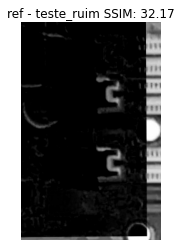

In [51]:
imBadReg_gray = cv2.cvtColor(imBadReg, cv2.COLOR_BGR2GRAY)

error_teste_alinhada_bad, diff_alinhada_bad = mse(ref_gray, imBadReg_gray)

print("Image matching Error between error_teste_ruim:", error_teste_alinhada_bad)
plt.subplot(111)
plt.imshow(diff_alinhada_bad,'gray')
plt.title(f"ref - teste_ruim SSIM: {error_teste_alinhada_bad:.2f}")
plt.axis('off')
plt.show()